In [1]:
import pandas as pd

df = pd.read_csv('monthly_dataset.csv')

df.head()

,Year,Month,Date,Population (million),Temperature (celsius),CPI,GDP (million bahts),Peak Load (MW),Generation (GWh),Consumption (GWh)
0,2002,Jan,2002-Jan,63.25,26.45,70.23,480343.33,14552.5,8261.93,7326.80
1,2002,Feb,2002-Feb,63.21,26.49,70.23,480343.33,15260.8,8187.95,7359.06
2,2002,Mar,2002-Mar,63.17,26.52,70.23,480343.33,16485.3,9687.11,8471.25
3,2002,Apr,2002-Apr,63.13,26.55,70.23,470404.67,16681.1,9378.36,8461.08
4,2002,May,2002-May,63.09,26.58,70.07,470404.67,16293.1,9654.67,8730.29


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   252 non-null    int64  
 1   Month                  252 non-null    object 
 2   Date                   252 non-null    object 
 3   Population (million)   252 non-null    float64
 4   Temperature (celsius)  252 non-null    float64
 5   CPI                    252 non-null    float64
 6   GDP (million bahts)    252 non-null    float64
 7   Peak Load (MW)         252 non-null    float64
 8   Generation (GWh)       252 non-null    float64
 9   Consumption (GWh)      252 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 19.8+ KB


In [3]:
df = df.drop(['Year', 'Month', 'Date', 'Generation (GWh)', 'Consumption (GWh)'], axis=1)

df = df.sample(frac=1).reset_index(drop=True)

df.head()

,Population (million),Temperature (celsius),CPI,GDP (million bahts),Peak Load (MW)
0,63.15,26.70,71.10,503668.33,16816.2
1,63.13,26.55,70.23,470404.67,16681.1
2,66.41,26.53,98.68,879639.33,26240.0
3,63.22,26.57,82.83,642930.67,20592.9
4,62.65,26.97,77.50,554664.67,19237.5


In [4]:
X = df.drop('Peak Load (MW)', axis=1).values
y = df['Peak Load (MW)'].values

X.shape, y.shape

((252, 4), (252,))

In [5]:
train_len = 240

X_train = X[:train_len]
X_test = X[train_len:]

y_train = y[:train_len]
y_test = y[train_len:]

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 4), (12, 4), (240,), (12,))

### TensorFlow

In [8]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(4,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer='Adam')

history = model.fit(X_train, y_train, epochs=5000, batch_size=48, validation_split=0.2)

Epoch 1/5000
4/4 [==============================] - 1s 74ms/step - loss: 556272064.0000 - val_loss: 554465984.0000
Epoch 2/5000
4/4 [==============================] - 0s 15ms/step - loss: 556261824.0000 - val_loss: 554456320.0000
Epoch 3/5000
4/4 [==============================] - 0s 16ms/step - loss: 556251328.0000 - val_loss: 554446016.0000
Epoch 4/5000
4/4 [==============================] - 0s 16ms/step - loss: 556240384.0000 - val_loss: 554434752.0000
Epoch 5/5000
4/4 [==============================] - 0s 17ms/step - loss: 556227904.0000 - val_loss: 554422080.0000
Epoch 6/5000
4/4 [==============================] - 0s 18ms/step - loss: 556214272.0000 - val_loss: 554407744.0000
Epoch 7/5000
4/4 [==============================] - 0s 16ms/step - loss: 556198656.0000 - val_loss: 554391360.0000
Epoch 8/5000
4/4 [==============================] - 0s 16ms/step - loss: 556180352.0000 - val_loss: 554372800.0000
Epoch 9/5000
4/4 [==============================] - 0s 16ms/step - loss: 5561598

In [10]:
import tensorflow as tf

tf.keras.models.save_model(model, 'ANN_tf_model')

INFO:tensorflow:Assets written to: ANN_tf_model\assets


INFO:tensorflow:Assets written to: ANN_tf_model\assets


In [15]:
model = tf.keras.models.load_model('ANN_tf_model')

In [16]:
test_loss = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)

1/1 [==============================] - 0s 266ms/step - loss: 815972.5000
Test loss: 815972.5


1/1 [==============================] - 0s 114ms/step


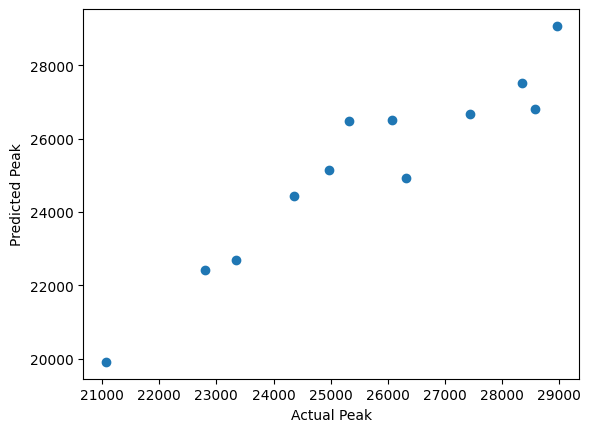

In [17]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Peak')
plt.ylabel('Predicted Peak')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
import math

def mape(test, pred):
    test, pred = np.array(test), np.array(pred)
    mape = np.mean(np.abs((test - pred) / test))
    return mape

MSE  = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
MAE  = mean_absolute_error(y_test, y_pred)
MAPE = mape(y_test, y_pred)

MSE, RMSE, MAE, MAPE

(815973.5800526376, 903.312559445864, 741.7360351562505, 0.10875228549844168)

### PyTorch

In [20]:
import torch
import torch.nn as nn

class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [22]:
model = ANN()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(5000):
    optimizer.zero_grad()
    outputs = model(torch.Tensor(X_train))
    loss = criterion(outputs.squeeze(), torch.Tensor(y_train))
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print('Epoch {}, Loss: {:.4f}'.format(epoch+1, loss.item()))


Epoch 100, Loss: 555766720.0000
Epoch 200, Loss: 554576256.0000
Epoch 300, Loss: 550804032.0000
Epoch 400, Loss: 543040576.0000
Epoch 500, Loss: 530161472.0000
Epoch 600, Loss: 511386912.0000
Epoch 700, Loss: 486350656.0000
Epoch 800, Loss: 455199776.0000
Epoch 900, Loss: 418537568.0000
Epoch 1000, Loss: 377391744.0000
Epoch 1100, Loss: 333233984.0000
Epoch 1200, Loss: 287813984.0000
Epoch 1300, Loss: 243066512.0000
Epoch 1400, Loss: 200910016.0000
Epoch 1500, Loss: 163033088.0000
Epoch 1600, Loss: 130704512.0000
Epoch 1700, Loss: 104613400.0000
Epoch 1800, Loss: 84784552.0000
Epoch 1900, Loss: 70628024.0000
Epoch 2000, Loss: 61103316.0000
Epoch 2100, Loss: 54986432.0000
Epoch 2200, Loss: 51125952.0000
Epoch 2300, Loss: 48612316.0000
Epoch 2400, Loss: 46826884.0000
Epoch 2500, Loss: 45401132.0000
Epoch 2600, Loss: 44139112.0000
Epoch 2700, Loss: 42934316.0000
Epoch 2800, Loss: 41744276.0000
Epoch 2900, Loss: 40536004.0000
Epoch 3000, Loss: 39302292.0000
Epoch 3100, Loss: 38038488.0000
